In [18]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import keras

In [19]:
IMAGE_SIZE=255
BATCH_SIZE=12

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
   'data',
   image_size=(IMAGE_SIZE,IMAGE_SIZE),
   batch_size=BATCH_SIZE
)

Found 4643 files belonging to 4 classes.


In [59]:
import numpy as np
np.argmax([[0.17461981 0.521735 0.05974223 0.23538893 0.00204277 0.000739 0.00066273 0.00506952]])


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3849637072.py, line 2)

(255, 255, 3)


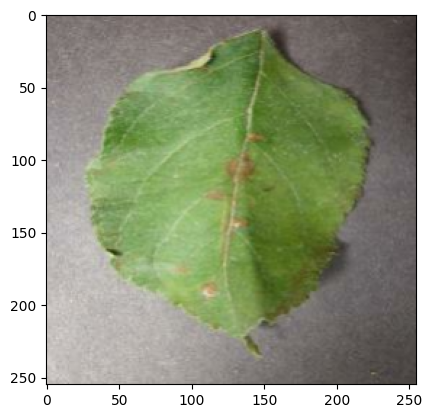

In [22]:
for image_batch,label in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    print(image_batch[0].shape)

In [23]:
def get_dataset_partions_df(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=1000):
    
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(ds_size*train_split)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    test_ds=ds.skip(train_size).take(val_size)

    val_ds=ds.skip(train_size).skip(val_size)
    return train_ds,test_ds,val_ds

In [24]:
train_ds,test_ds,val_ds=get_dataset_partions_df(dataset)

In [25]:
len(test_ds)*12,len(val_ds)*12,len(train_ds)*12


(456, 480, 3708)

In [26]:
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
train_ds_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [27]:
resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)  # Normalizes pixel values to [0, 1]
])
data_agumentation=tf.keras.Sequential([
layers.RandomFlip('horizantal_and_vertical'),
layers.RandomRotation(0.2)
])

In [28]:
import os

# Absolute path (example)
image_path = os.path.abspath("artifacts/raw/Apple___Apple_scab/Apple___Apple_scab_1_1.jpg")
print(image_path)  # Check if it prints the correct path

if os.path.exists(image_path):
    img = Image.open(image_path).convert("RGB")
else:
    print("Image not found.")


c:\Users\n shiva kumar\OneDrive\Desktop\image_classification\notebook\artifacts\raw\Apple___Apple_scab\Apple___Apple_scab_1_1.jpg
Image not found.


In [29]:
CHANNEL=3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
model=models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
]
)


c:\Users\n shiva kumar\OneDrive\Desktop\image_classification\imgvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (12, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (12, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (12, 253, 253, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (12, 126, 126, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (12, 124, 124, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (12, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (12, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (12, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (12, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (12, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (12, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (12, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (12, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (12, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (12, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (12, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (12, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history= model.fit(
train_ds,
epochs=2,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds
)

Epoch 1/2


309/309 ━━━━━━━━━━━━━━━━━━━━ 120s 355ms/step - accuracy: 0.5475 - loss: 1.0742 - val_accuracy: 0.7708 - val_loss: 0.6626
Epoch 2/2
309/309 ━━━━━━━━━━━━━━━━━━━━ 111s 341ms/step - accuracy: 0.7463 - loss: 0.6837 - val_accuracy: 0.8562 - val_loss: 0.3717


In [35]:
pred=model.predict(test_ds)

38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step


In [36]:
pred

array([[9.2493546e-01, 2.5232160e-02, 2.8201863e-03, 4.7012158e-02],
       [2.5352908e-02, 1.3930347e-02, 9.1847664e-01, 4.2240042e-02],
       [4.9895463e-03, 9.9300683e-01, 3.4840949e-04, 1.6552606e-03],
       ...,
       [5.3511035e-01, 4.5488957e-01, 2.2170495e-03, 7.7831070e-03],
       [6.6749067e-03, 2.2614761e-03, 1.2821204e-05, 9.9105084e-01],
       [5.5195033e-03, 3.2006947e-03, 4.7101981e-05, 9.9123269e-01]],
      dtype=float32)

In [37]:
import numpy as np
[class_names[np.argmax(i)] for i in pred]

['Apple___Apple_scab',
 'Apple___Cedar_apple_rust',
 'Apple___Black_rot',
 'Apple___healthy',
 'Apple___healthy',
 'Apple___healthy',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Apple___healthy',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Apple___healthy',
 'Apple___healthy',
 'Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Black_rot',
 'Apple___Apple_scab',
 'Apple___healthy',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Apple___Apple_scab',
 'Apple___healthy',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Apple_scab',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Apple___Apple_scab',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 

In [38]:
for image_batch,label_batch in test_ds.take(1):
    print(label_batch[0])

tf.Tensor(1, shape=(), dtype=int32)


In [39]:
len(train_ds),len(test_ds)

(309, 38)

In [40]:
history.params

{'verbose': 1, 'epochs': 2, 'steps': 309}

In [41]:
train_history=history.history

In [42]:
train_history

{'accuracy': [0.6274615526199341, 0.7564067840576172],
 'loss': [0.9360543489456177, 0.6704869270324707],
 'val_accuracy': [0.7708333134651184, 0.856249988079071],
 'val_loss': [0.6625576019287109, 0.37173569202423096]}

In [44]:
EPOCH=1
train_pred=train_history['accuracy'][EPOCH]
val_pred=train_history['val_accuracy'][EPOCH]
train_pred,val_pred

(0.7564067840576172, 0.856249988079071)

In [45]:
len(test_ds)

38

In [46]:
predict_list=[]
actual_list=[]
for image_batch, label_batch in test_ds.take(38):
    first_img = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    # plt.imshow(first_img)
    # plt.title(f'Actual label: {class_names[first_label]}')
    pred=model.predict(image_batch)
    predict_list.extend([int(np.argmax(i)) for i in pred])
    actual_list.extend(label_batch)
print(predict_list)
print(actual_list)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(predict_list,actual_list)

0.8571428571428571

In [48]:
38*12

456

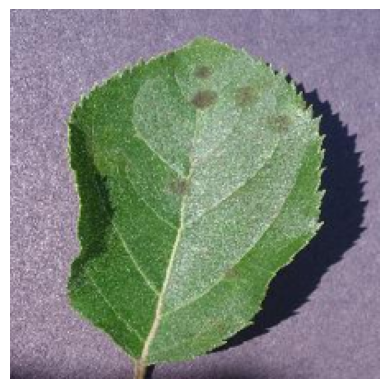

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: [[0.1234896  0.05110626 0.00898575 0.81641835]]


In [54]:
import io
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

# Load and preprocess the image
image_file = 'data\\Apple___Apple_scab\\image (2).JPG'  # Correct path
img = Image.open(image_file).convert("RGB")
img = img.resize((225, 225))

# Convert to array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Add batch dimension (model expects shape: (1, 225, 225, 3))
img_array = tf.expand_dims(img_array, axis=0)  # Or use np.expand_dims

# Normalize (if not using Rescaling layer)
img_array = img_array / 255.0

# Show image
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict
prediction = model.predict(img_array)
print("Prediction:", prediction)
